<a href="https://colab.research.google.com/github/princ1211/MaskDetect/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# New Section

# New Section

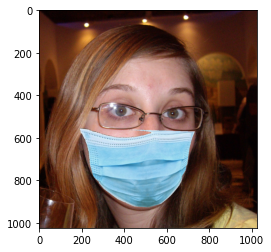

In [3]:
DataDirectory= "/content/drive/MyDrive/Dataset/"
classes=["FaceMask", "NoMask"]
for category in classes:
  path= os.path.join(DataDirectory, category)
  for img in os.listdir(path):
    img_array= cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

# New Section

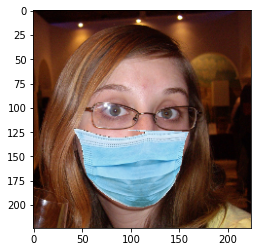

In [4]:
img_size=224
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,  cv2.COLOR_BGR2RGB))

In [5]:
training_data=[]
def create_training_data():
  for category in classes:
    path=os.path.join(DataDirectory, category)
    class_num= classes.index(category)
  
    for img in os.listdir(path):
      try:
        img_array= cv2.imread(os.path.join(path,img))
        new_array= cv2.resize(img_array,(img_size, img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass
 

In [6]:
create_training_data()

In [7]:
print(len(training_data))

781


Image Dataset get loaded !

In [20]:
import random

random.shuffle(training_data)

In [21]:
X = []  ##data
y = [] ##label

for features, label in training_data:
  X.append(features)
  y.append(label)


X = np.array(X).reshape(-1, img_size, img_size, 3)

In [10]:
X.shape
X = X/225.0;

In [11]:
y[100]

0

In [12]:
Y = np.array(y)

In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

**Transfer Learning**

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [18]:
base_input = model.layers[0].input

In [22]:
base_output=model.layers[-4].output

In [23]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [24]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [25]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [27]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [28]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)

22/22 [==============================] - 143s 6s/step - loss: 1.1250 - accuracy: 0.5268 - val_loss: 0.9381 - val_accuracy: 0.4810


In [29]:
new_model.save('my_model3.h5')

In [32]:
new_model=tf.keras.models.load_model('my_model3.h5')

Image Testing 

In [5]:
frame=cv2.imread('/content/drive/MyDrive/Dataset/FaceMask/test.jpg')

In [47]:
frame=cv2.imread('/content/drive/MyDrive/comp.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(frame,  cv2.COLOR_BGR2RGB))

In [49]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [51]:

gr=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [52]:
gr.shape

(338, 324)

In [55]:
faces=faceCascade.detectMultiScale(gr,1.1,4)
for x,y,w,h in faces:
    roi_gray=gr[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]


In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [57]:


final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0


In [58]:
Predictions=new_model.predict(final_image)

In [59]:

Predictions


array([[0.01012152]], dtype=float32)

In [74]:
from google.colab.patches import cv2_imshow

path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

rectangle_bgr=(255,255,255)

img=np.zeros((500,500))

text="Some text in a box!"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x = 10
text_offset_y= img.shape[0]- 25

box_coords= ((text_offset_x,text_offset_y),(text_offset_x + text_width + 2, text_offset_y - text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)



    
while True:
    
    
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color= frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh)in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
     
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    font= cv2.FONT_HERSHEY_SIMPLEX
    Predictions= new_model.predict(final_image)
    
    font_scale=1.5
    font= cv2.FONT_HERSHEY_PLAIN
    
    
    if(Predictions>0):
        status="No Mask"
        
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    else:
        
        status="Face Mask"
        
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
        
        
        
        
        
        
        
        
    cv2_imshow(frame)
    
    if cv2.waitKey(2)& 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

 

For Live Video

In [86]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [94]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

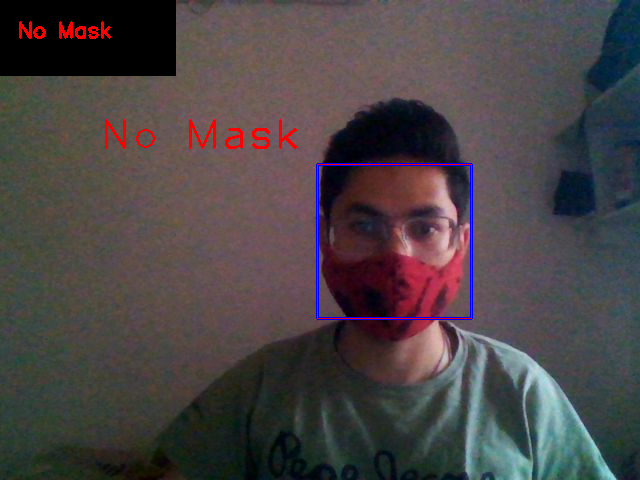

MessageError: ignored

In [108]:
from google.colab.patches import cv2_imshow
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

rectangle_bgr=(255,255,255)

img=np.zeros((500,500))

text="Some text in a box!"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x = 10
text_offset_y= img.shape[0]- 25

box_coords= ((text_offset_x,text_offset_y),(text_offset_x + text_width + 2, text_offset_y - text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)


# cap=cv2.VideoCapture(1)
# if not cap.isOpened():
#     cap=cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot Open Webcam")
video_stream()    
label_html = 'Capturing...'
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color= img[y:y+h,x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh)in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
     
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    font= cv2.FONT_HERSHEY_SIMPLEX
    Predictions= new_model.predict(final_image)
    
    font_scale=1.5
    font= cv2.FONT_HERSHEY_PLAIN
    
    
    if(Predictions>0):
        status="No Mask"
        
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
    
    else:
        
        status="Face Mask"
        
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(img,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(img,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        
        cv2.putText(img,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255))
        
        
        
        
        
        
        
        
        
    #cv2.imshow("Face Mask Detection",img)
    cv2_imshow(img)
    if cv2.waitKey(2)& 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# New Section